In [1]:
import xarray as xr
# file = '/Users/mikesmith/Downloads/5MHz_6km_realtime-agg_2f30_fcd6_a21e.nc'
file = '/Users/mikesmith/Downloads/5MHz_6km_realtime-agg_a667_a2f2_f11b.nc'

ds = xr.open_dataset(file)
ds

<xarray.Dataset>
Dimensions:      (latitude: 185, longitude: 155, time: 745)
Coordinates:
  * time         (time) datetime64[ns] 2021-08-21T14:00:00 ... 2021-09-21T14:...
  * latitude     (latitude) float32 33.54882 33.60276 ... 43.41984 43.47378
  * longitude    (longitude) float32 -76.97678 -76.9187 ... -68.09127 -68.0332
Data variables:
    u            (time, latitude, longitude) float32 ...
    v            (time, latitude, longitude) float32 ...
    u_err        (time, latitude, longitude) float32 ...
    v_err        (time, latitude, longitude) float32 ...
    num_radials  (time, latitude, longitude) float64 ...
    site_code    (time, latitude, longitude) float64 ...
Attributes:
    cdm_data_type:              Grid
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creation_date:              Tue Sep 21 13:01:21 2021 EDT
    creator_email:              michaesm@marine.rutgers.edu
    creator_name:               Michael Smith
    creator_type:               person
    creator_url:                https://marine.rutgers.edu/main/
    Easternmost_Easting:        -68.0332
    geospatial_lat_max:         43.47378
    geospatial_lat_min:         33.54882
    geospatial_lat_resolution:  0.053939999999999995
    geospatial_lat_units:       degrees_north
    geospatial_lon_max:         -68.0332
    geospatial_lon_min:         -76.97678
    geospatial_lon_resolution:  0.05807519480519488
    geospatial_lon_units:       degrees_east
    header:                     %TimeStamp: 2021 09 21 14 00\n%TimeZone: GMT+...
    history:                    Hourly codar radial data combined into one ho...
    id:                         RU_5MHz_2021_09_21_1400
    infoUrl:                    https://marine.rutgers.edu/main/
    institution:                Center for Ocean Observing Leadership, Rutger...
    keywords:                   5mhz, 6km, applications, association, atlanti...
    keywords_vocabulary:        GCMD Science Keywords
    license:                    The data may be used and redistributed for fr...
    naming_authority:           edu.rutgers.marine.rucool
    Northernmost_Northing:      43.47378
    source:                     surface observation
    sourceUrl:                  (local files)
    Southernmost_Northing:      33.54882
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    Optimally Interpolated Total Vectors calculat...
    time_coverage_end:          2021-09-21T14:00:00Z
    time_coverage_start:        2021-08-21T14:00:00Z
    title:                      Surface Currents - MARACOOS - 5MHz - Realtime...
    Westernmost_Easting:        -76.97678

In [2]:
time_start = ds.time.data.min()
time_end = ds.time.data.max()

In [3]:
time_start, time_end

(numpy.datetime64('2021-08-21T14:00:00.000000000'),
 numpy.datetime64('2021-09-21T14:00:00.000000000'))

### I grabbed a month of data from the hfr.marine.rutgers.edu erddap server in netCDF format. 

In [4]:
# Here i'm going to average the month of data by the time variable. This will give the monthly average .
ds = ds.mean('time')

## Use the .squeeze() method to remove singleton dimensions

In [5]:
ds = ds.squeeze()
ds

<xarray.Dataset>
Dimensions:      (latitude: 185, longitude: 155)
Coordinates:
  * latitude     (latitude) float32 33.54882 33.60276 ... 43.41984 43.47378
  * longitude    (longitude) float32 -76.97678 -76.9187 ... -68.09127 -68.0332
Data variables:
    u            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    v            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    u_err        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    v_err        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    num_radials  (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    site_code    (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [6]:
lon = ds['longitude']
lat = ds['latitude']

## Plot lon, lat, u, v with a quiver plot

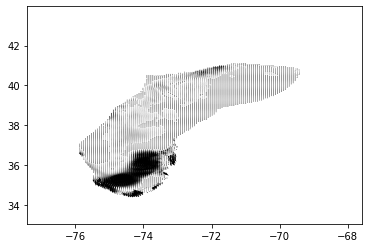

In [7]:
import matplotlib.pyplot as plt

plt.quiver(lon, lat, ds['u'], ds['v'])

### This doesn't look great. Let's add it to a map

In [8]:
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

projection = ccrs.Mercator()

extent = [
    lon.min() - 1,
    lon.max() + 1,
    lat.min() - 1,
    lat.max() + 1
]

LAND = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor='tan'
)

state_lines = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none'
)

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in cos
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in sin
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


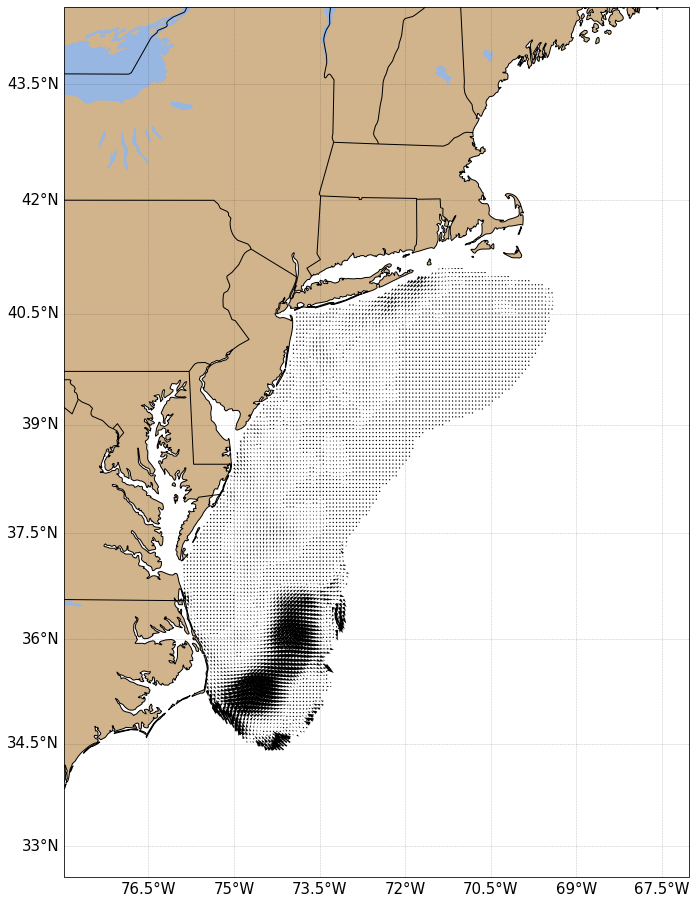

In [9]:
# Initialize blank plot with a platecarree projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection)
)

# plot arrows over pcolor
h = ax.quiver(
    ds['longitude'].data, 
    ds['latitude'].data, 
    ds['u'].data, 
    ds['v'].data,
    transform=ccrs.PlateCarree(),
    zorder=20
)

# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(state_lines, edgecolor='black')

# if scale:
#     angle, speed = uv2spdir(u, v)  # convert u/v to angle and speed
#     u, v = spdir2uv(  # convert angle and speed back to u/v, normalizing the arrow sizes
#         np.ones_like(speed),
#         angle,
#         deg=True
#     )

# velocity_min = velocity_min or np.int32(np.nanmin(speed)) or 0
# velocity_max = velocity_max or np.int32(np.nanmax(speed)) or 15

# kwargs = dict(sub=2,
#               title='Maracoos Quiver plot',
#               meshgrid=True,
#               scale=60,
#               headwidth=3,
#               headlength=5,
#               headaxislength=4.5)

# kwargs['color_clipped'] = np.clip(
#     speed[::sub],
#     velocity_min,
#     velocity_max
# ).squeeze()

# kwargs['offset'] = Normalize(vmin=velocity_min, vmax=velocity_max, clip=True)
# kwargs['ticks'] = np.append(np.arange(velocity_min, velocity_max, cbar_step), velocity_max)
# kwargs['extent'] = extent

### There are way too many arrows on this plot. Let's downsample the data.

In [10]:
ds

<xarray.Dataset>
Dimensions:      (latitude: 185, longitude: 155)
Coordinates:
  * latitude     (latitude) float32 33.54882 33.60276 ... 43.41984 43.47378
  * longitude    (longitude) float32 -76.97678 -76.9187 ... -68.09127 -68.0332
Data variables:
    u            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    v            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    u_err        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    v_err        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    num_radials  (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    site_code    (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [11]:
tds = ds.coarsen(longitude=2, latitude=2, boundary='pad').mean()
tds

<xarray.Dataset>
Dimensions:      (latitude: 93, longitude: 78)
Coordinates:
  * latitude     (latitude) float32 33.57579 33.68367 ... 43.392868 43.47378
  * longitude    (longitude) float32 -76.94774 -76.83159 ... -68.120316 -68.0332
Data variables:
    u            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    v            (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    u_err        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    v_err        (latitude, longitude) float32 nan nan nan nan ... nan nan nan
    num_radials  (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    site_code    (latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in cos
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in sin
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


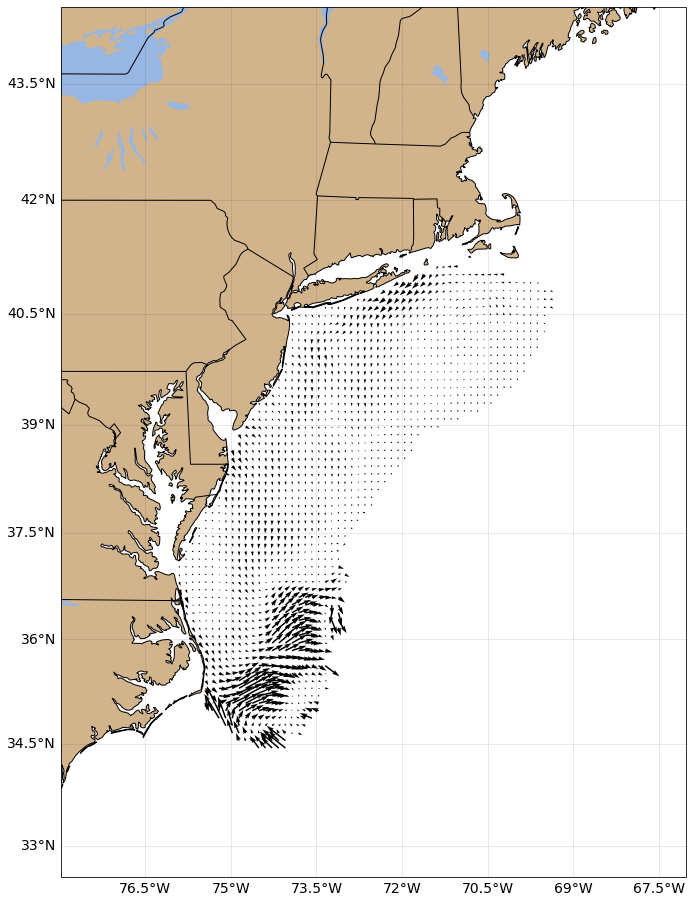

In [12]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection)
)

# plot arrows over pcolor
h = ax.quiver(
    tds['longitude'].data, 
    tds['latitude'].data, 
    tds['u'].data, 
    tds['v'].data,
    transform=ccrs.PlateCarree(),
    zorder=20
)

# Gridlines and grid labels
gl = ax.gridlines(
    draw_labels=True,
    linewidth=.5,
    color='black',
    alpha=0.25,
    linestyle='--',
)

gl.xlabels_top = gl.ylabels_right = False
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Axes properties and features
ax.set_extent(extent)
ax.add_feature(LAND, zorder=0, edgecolor='black')
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(state_lines, edgecolor='black')

#### Let's turn the mapping features into a function

In [13]:
def get_ticks(bounds, dirs, otherbounds):
    dirs = dirs.lower()
    l0 = np.float(bounds[0])
    l1 = np.float(bounds[1])
    r = np.max([l1 - l0, np.float(otherbounds[1]) - np.float(otherbounds[0])])
    if r <= 1.5:
        # <1.5 degrees: 15' major ticks, 5' minor ticks
        minor_int = 1.0 / 12.0
        major_int = 1.0 / 4.0
    elif r <= 3.0:
        # <3 degrees: 30' major ticks, 10' minor ticks
        minor_int = 1.0 / 6.0
        major_int = 0.5
    elif r <= 7.0:
        # <7 degrees: 1d major ticks, 15' minor ticks
        minor_int = 0.25
        major_int = np.float(1)
    elif r <= 15:
        # <15 degrees: 2d major ticks, 30' minor ticks
        minor_int = 0.5
        major_int = np.float(2)
    elif r <= 30:
        # <30 degrees: 3d major ticks, 1d minor ticks
        minor_int = np.float(1)
        major_int = np.float(3)
    else:
        # >=30 degrees: 5d major ticks, 1d minor ticks
        minor_int = np.float(1)
        major_int = np.float(5)

    minor_ticks = np.arange(np.ceil(l0 / minor_int) * minor_int, np.ceil(l1 / minor_int) * minor_int + minor_int,
                            minor_int)
    minor_ticks = minor_ticks[minor_ticks <= l1]
    major_ticks = np.arange(np.ceil(l0 / major_int) * major_int, np.ceil(l1 / major_int) * major_int + major_int,
                            major_int)
    major_ticks = major_ticks[major_ticks <= l1]

    if major_int < 1:
        d, m, s = dd2dms(np.array(major_ticks))
        if dirs == 'we' or dirs == 'ew' or dirs == 'lon' or dirs == 'long' or dirs == 'longitude':
            n = 'W' * sum(d < 0)
            p = 'E' * sum(d >= 0)
            dir = n + p
            major_tick_labels = [str(np.abs(int(d[i]))) + u"\N{DEGREE SIGN}" + str(int(m[i])) + "'" + dir[i] for i in
                                 range(len(d))]
        elif dirs == 'sn' or dirs == 'ns' or dirs == 'lat' or dirs == 'latitude':
            n = 'S' * sum(d < 0)
            p = 'N' * sum(d >= 0)
            dir = n + p
            major_tick_labels = [str(np.abs(int(d[i]))) + u"\N{DEGREE SIGN}" + str(int(m[i])) + "'" + dir[i] for i in
                                 range(len(d))]
        else:
            major_tick_labels = [str(int(d[i])) + u"\N{DEGREE SIGN}" + str(int(m[i])) + "'" for i in range(len(d))]
    else:
        d = major_ticks
        if dirs == 'we' or dirs == 'ew' or dirs == 'lon' or dirs == 'long' or dirs == 'longitude':
            n = 'W' * sum(d < 0)
            p = 'E' * sum(d >= 0)
            dir = n + p
            major_tick_labels = [str(np.abs(int(d[i]))) + u"\N{DEGREE SIGN}" + dir[i] for i in range(len(d))]
        elif dirs == 'sn' or dirs == 'ns' or dirs == 'lat' or dirs == 'latitude':
            n = 'S' * sum(d < 0)
            p = 'N' * sum(d >= 0)
            dir = n + p
            major_tick_labels = [str(np.abs(int(d[i]))) + u"\N{DEGREE SIGN}" + dir[i] for i in range(len(d))]
        else:
            major_tick_labels = [str(int(d[i])) + u"\N{DEGREE SIGN}" for i in range(len(d))]

    return minor_ticks, major_ticks, major_tick_labels

In [14]:
def add_map_features(ax, extent):
#     # Gridlines and grid labels
#     gl = ax.gridlines(
#         draw_labels=True,
#         linewidth=.5,
#         color='black',
#         alpha=0.25,
#         linestyle='--',
#     )

#     gl.xlabels_top = gl.ylabels_right = False
#     gl.xlabel_style = {'size': 16, 'color': 'black'}
#     gl.ylabel_style = {'size': 16, 'color': 'black'}

#     gl.xformatter = LONGITUDE_FORMATTER
#     gl.yformatter = LATITUDE_FORMATTER

    xl = [extent[0], extent[1]]
    yl = [extent[2], extent[3]]

    tick0x, tick1, ticklab = get_ticks(xl, 'we', yl)
    ax.set_xticks(tick0x, minor=True, crs=ccrs.PlateCarree())
    ax.set_xticks(tick1, crs=ccrs.PlateCarree())
    ax.set_xticklabels(ticklab, fontsize=14)

    # get and add latitude ticks/labels
    tick0y, tick1, ticklab = get_ticks(yl, 'sn', xl)
    ax.set_yticks(tick0y, minor=True, crs=ccrs.PlateCarree())
    ax.set_yticks(tick1, crs=ccrs.PlateCarree())
    ax.set_yticklabels(ticklab, fontsize=14)

    gl = ax.gridlines(draw_labels=False, linewidth=.5, color='gray', alpha=0.75, linestyle='--', crs=ccrs.PlateCarree())
    gl.xlocator = mticker.FixedLocator(tick0x)
    gl.ylocator = mticker.FixedLocator(tick0y)

    ax.tick_params(which='major',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   length=5, width=2)

    ax.tick_params(which='minor',
                   direction='out',
                   bottom=True, top=True,
                   labelbottom=True, labeltop=False,
                   left=True, right=True,
                   labelleft=True, labelright=False,
                   width=1)

    # Axes properties and features
    ax.set_extent(extent)
    ax.add_feature(LAND, zorder=0, edgecolor='black')
    ax.add_feature(cfeature.LAKES)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(state_lines, edgecolor='black')
    return ax

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.

<GeoAxesSubplot:>

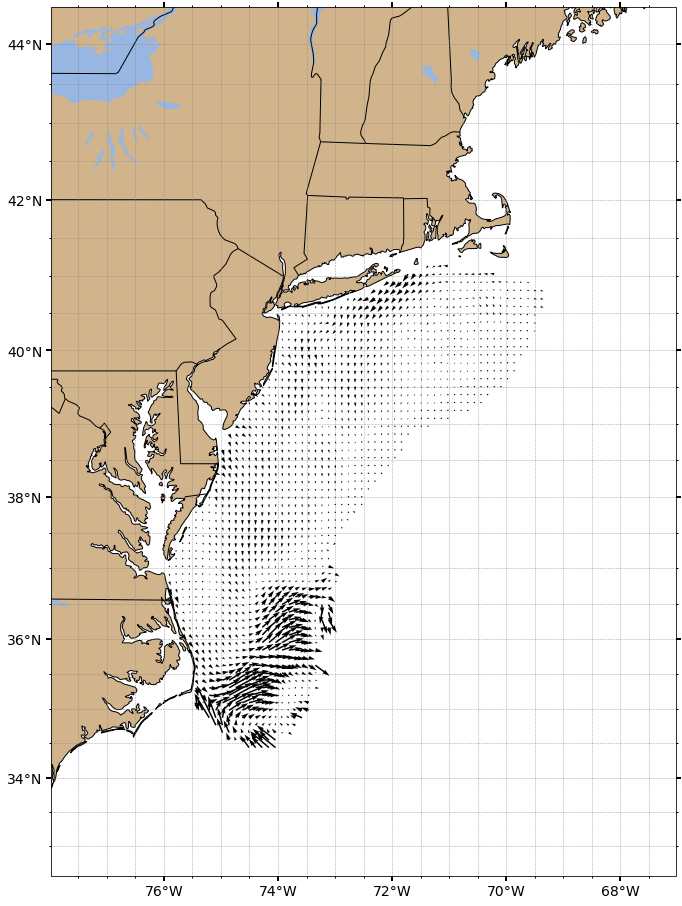

In [15]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection)
)

# plot arrows over pcolor
h = ax.quiver(
    tds['longitude'].data, 
    tds['latitude'].data, 
    tds['u'].data, 
    tds['v'].data,
    transform=ccrs.PlateCarree(),
    zorder=20
)

add_map_features(ax, extent)

#### Let's make the arrows a little easier to see

In [16]:
from oceans.ocfis import uv2spdir, spdir2uv

angle, speed = uv2spdir(tds.u, tds.v)  # convert u/v to angle and speed
u, v = spdir2uv(  # convert angle and speed back to u/v, normalizing the arrow sizes
    np.ones_like(speed),
    angle,
    deg=True
)

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/oceans/ocfis.py:90: RuntimeWarning: invalid value encountered in remainder
  ang = np.mod(90.0 - ang, 360.0)  # Zero is North.
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/oceans/ocfis.py:35: RuntimeWarning: invalid value encountered in sin
  u = spd * np.sin(ang)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/oceans/ocfis.py:36: RuntimeWarning: invalid value encountered in cos
  v = spd * np.cos(ang)


/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.

<GeoAxesSubplot:>

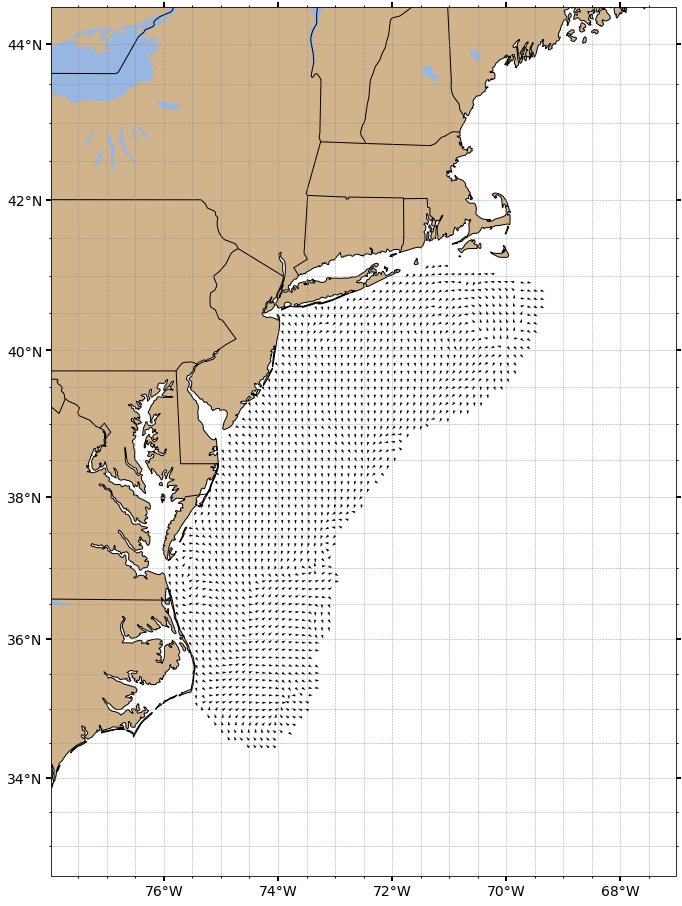

In [17]:
# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection)
)

# plot arrows over pcolor
h = ax.quiver(
    tds['longitude'].data, 
    tds['latitude'].data, 
    u, 
    v,
    transform=ccrs.PlateCarree(),
    zorder=20
)

add_map_features(ax, extent)

### Let's change the arrows

In [18]:
velocity_min = np.int32(np.nanmin(speed)) # Get the minimum speed from the data
velocity_max =np.int32(np.nanmax(speed)) # Get the maximum speed from the data

velocity_min = 0 # Get the minimum speed from the data
velocity_max = 40 # Get the maximum speed from the data

# Setup a keyword argument, kwargs, dictionary to pass optional arguments to the quiver plot
kwargs = dict(
    transform=ccrs.PlateCarree(),
    scale=65, # Number of data units per arrow length unit, e.g., m/s per plot width; a smaller scale parameter makes the arrow longer. Default is None.
    headwidth=2.75, # Head width as multiple of shaft width.
    headlength=2.75, #Head length as multiple of shaft width.
    headaxislength=2.5, # Head length at shaft intersection.
    minshaft=1,
    minlength=1
)

# Clip the colors 
color_clipped = np.clip(speed, velocity_min, velocity_max).squeeze(),

# Set the colorbar ticks to correspond to the velocity minimum and maximum of the data with a step of 20... Append the max velocity 
ticks = np.append(np.arange(velocity_min, velocity_max, 5), velocity_max)

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in cos
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1965: RuntimeWarning: invalid value encountered in sin
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mikesmith/miniconda3/envs/hfradar

Text(0.5, 1.0, 'MARACOOS Surface Currents\nAverage from 2021-08-21 14:00:00 to 2021-09-21 14:00:00')

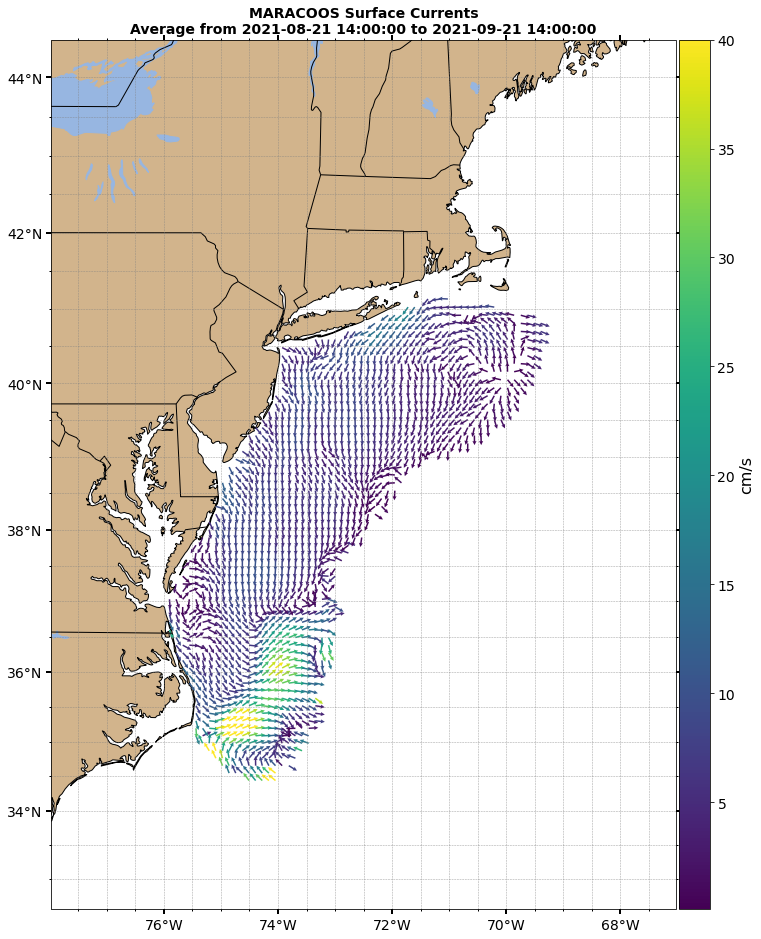

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection)
)

# plot arrows over pcolor
h = ax.quiver(
    tds['longitude'], 
    tds['latitude'], 
    u, 
    v,
    color_clipped,
    **kwargs #Pass in the kwargs from the above cell
)

# Add map features to the axes
add_map_features(ax, extent)

# Create a space for the colorbar to the right of the plot
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.05, axes_class=plt.Axes)
fig.add_axes(cax)

# Create the colorbar in the space above
cb = plt.colorbar(h, cax=cax, ticks=ticks)
cb.ax.set_yticklabels([f'{s:d}' for s in ticks], fontsize=14)
cb.set_label('cm/s', fontsize=16)
t0_str = pd.Timestamp(time_start).strftime('%Y-%m-%d %H:%M:00')
t1_str = pd.Timestamp(time_end).strftime('%Y-%m-%d %H:%M:00')
ax.set_title(f'MARACOOS Surface Currents\nAverage from {t0_str} to {t1_str}', fontsize=14, fontweight='bold')

Mike Smith: michaesm@marine.rutgers.edu

In [20]:
import cmocean

In [21]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib import colors as c

cbar_min = 0 #cm/s
cbar_max = 40 #cm/s
cbar_step = 5 #bins of 5 cm/s

# Create bins between cbar_min and cbar_max with a step of cbar_step 
ticks = np.arange(cbar_min, cbar_max + cbar_step, cbar_step)

# Set cmap equal to the colormap you want your plot to be
# cmap = cm.get_cmap('viridis') #mpl colormaps 
cmap = cmocean.cm.curl #cmocean colormap

# Use bins/ticks as boundarys for colormaps
norm = c.BoundaryNorm(ticks, cmap.N)  

# Clip the colors 
color_clipped = np.clip(speed, velocity_min, velocity_max).squeeze(),

# Pass cmap and norm to the keyword arguments (kwargs) of the plotting function. Or if you don't use kwargs, specify them manually when calling the function
kwargs['cmap'] = cmap
kwargs['norm'] = norm

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.

Text(0.5, 1.0, 'MARACOOS Surface Currents\nAverage from 2021-08-21 14:00:00 to 2021-09-21 14:00:00')

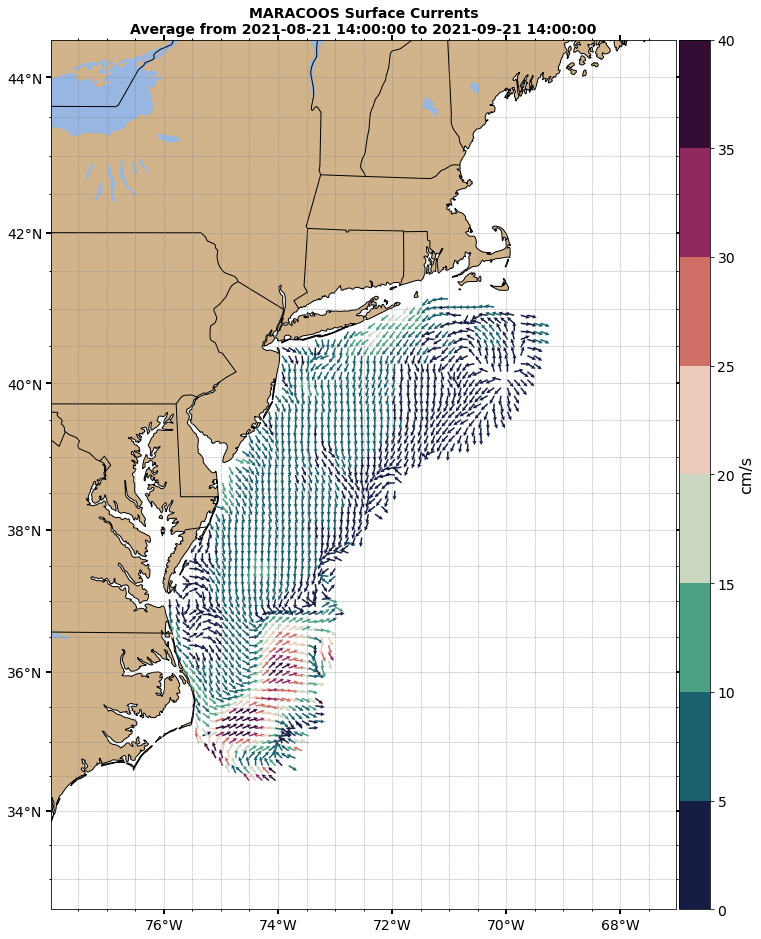

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=projection)
)

# plot arrows over pcolor
h = ax.quiver(
    tds['longitude'], 
    tds['latitude'], 
    u, 
    v,
    color_clipped, # color arrows by velocity
    **kwargs #Pass in the kwargs from the above cell
)

# Add map features to the axes
add_map_features(ax, extent)

# Create a space for the colorbar to the right of the plot
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.05, axes_class=plt.Axes)
fig.add_axes(cax)

# Create the colorbar in the space above
cb = plt.colorbar(h, cax=cax, ticks=ticks)
cb.ax.set_yticklabels([f'{s:d}' for s in ticks], fontsize=14)
cb.set_label('cm/s', fontsize=16)
t0_str = pd.Timestamp(time_start).strftime('%Y-%m-%d %H:%M:00')
t1_str = pd.Timestamp(time_end).strftime('%Y-%m-%d %H:%M:00')
ax.set_title(f'MARACOOS Surface Currents\nAverage from {t0_str} to {t1_str}', fontsize=14, fontweight='bold')

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.

Text(0.5, 1.0, 'MARACOOS Surface Currents\nAverage from 2021-08-21 14:00:00 to 2021-09-21 14:00:00')

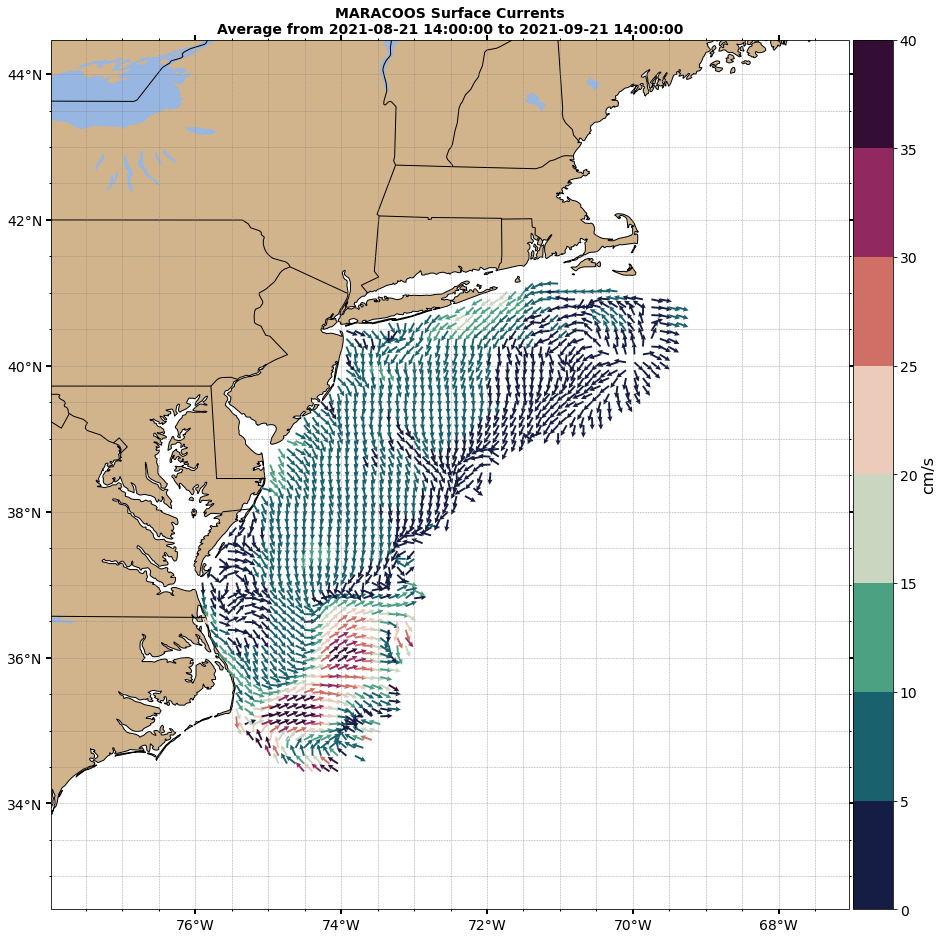

In [23]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Initialize blank plot with a mercator projection
fig, ax = plt.subplots(
    figsize=(22, 16),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)

kwargs['cmap'] = cmocean.cm.curl
kwargs['transform'] = ccrs.PlateCarree()

# plot arrows over pcolor
h = ax.quiver(
    tds['longitude'], 
    tds['latitude'], 
    u, 
    v,
    color_clipped,
    **kwargs #Pass in the kwargs from the above cell
)

# Add map features to the axes
add_map_features(ax, extent)

# Create a space for the colorbar to the right of the plot
divider = make_axes_locatable(ax)
cax = divider.new_horizontal(size='5%', pad=0.05, axes_class=plt.Axes)
fig.add_axes(cax)

# Create the colorbar in the space above
cb = plt.colorbar(h, cax=cax, ticks=ticks)
cb.ax.set_yticklabels([f'{s:d}' for s in ticks], fontsize=14)
cb.set_label('cm/s', fontsize=16)
t0_str = pd.Timestamp(time_start).strftime('%Y-%m-%d %H:%M:00')
t1_str = pd.Timestamp(time_end).strftime('%Y-%m-%d %H:%M:00')
ax.set_title(f'MARACOOS Surface Currents\nAverage from {t0_str} to {t1_str}', fontsize=14, fontweight='bold')

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

lon, lat = np.meshgrid(tds.longitude, tds.latitude)
# u = tds.u.data
# v = tds.v.data

# 
# resample onto a 50x50 grid
nx, ny = 100, 100

# (N, 2) arrays of input x,y coords and u,v values
pts = np.vstack((lon.ravel(), lat.ravel())).T
vals = np.vstack((u.ravel(), v.ravel())).T

# the new x and y coordinates for the grid, which will correspond to the
# columns and rows of u and v respectively
xi = np.linspace(lon.min(), lon.max(), nx)
yi = np.linspace(lat.min(), lat.max(), ny)

# an (nx * ny, 2) array of x,y coordinates to interpolate at
ipts = np.vstack(a.ravel() for a in np.meshgrid(yi, xi)[::-1]).T

/Users/mikesmith/miniconda3/envs/hfradar/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


In [68]:
np.nanmin(vals[:,1]), np.nanmax(vals[:,1])

(-1.0, 0.99985814)

In [72]:
# an (nx * ny, 2) array of interpolated u, v values
ivals = griddata(pts, vals, ipts, method='nearest') # Only works with nearest


In [ ]:
# reshape interpolated u,v values into (ny, nx) arrays
ui, vi = ivals.T
ui.shape = vi.shape = (ny, nx)


norm = np.sqrt(ui**2 + vi**2)
norm_flat = norm.flatten()

start_points = np.array([xi.flatten(), yi.flatten()]).T

plt.clf()
scale = .2/np.max(norm)

plt.subplot(111)
plt.title('scaling only the length')
for i in range(start_points.shape[0]):
    plt.streamplot(xi, yi, ui, vi, 
                   color='k',
                   start_points=np.array([start_points[i,:]]),
                   minlength=.95*norm_flat[i]*scale,
                   maxlength=1.0*norm_flat[i]*scale,
                   integration_direction='backward', 
                   density=10, 
                   arrowsize=0.0)
    
plt.quiver(xi, yi, ui/norm, vi/norm, scale=30)
plt.axis('square')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
w = 3
Y, X = np.mgrid[-w:w:8j, -w:w:8j]

U = -Y
V = X
norm = np.sqrt(U**2 + V**2)
norm_flat = norm.flatten()

start_points = np.array([X.flatten(),Y.flatten()]).T

plt.clf()
scale = .2/np.max(norm)

plt.subplot(121)
plt.title('scaling only the length')
for i in range(start_points.shape[0]):
    plt.streamplot(X,Y,U,V, color='k', start_points=np.array([start_points[i,:]]),minlength=.95*norm_flat[i]*scale, maxlength=1.0*norm_flat[i]*scale,
                integration_direction='backward', density=10, arrowsize=0.0)
plt.quiver(X,Y,U/norm, V/norm,scale=30)
plt.axis('square')



plt.subplot(122)
plt.title('scaling length, arrowhead and linewidth')
for i in range(start_points.shape[0]):
    plt.streamplot(X,Y,U,V, color='k', start_points=np.array([start_points[i,:]]),minlength=.95*norm_flat[i]*scale, maxlength=1.0*norm_flat[i]*scale,
                integration_direction='backward', density=10, arrowsize=0.0, linewidth=.5*norm_flat[i])
plt.quiver(X,Y,U/np.max(norm), V/np.max(norm),scale=30)

plt.axis('square')